   #                             Statistics Mini Project

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
import scikit_posthocs

1. Perform the following statistical analysis on the fifa world cup dataset. 

The dataset consists of player information, which includes height; weight overall rating, 

potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [2]:
df=pd.read_csv('fifa_stats.csv')
df.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
#treating null values

In [4]:
null_count=df.columns[df.isna().any()].to_list()
null_count

['Club']

In [5]:
print("null_count")
print(df[null_count].isna().sum())
print('-'*20)
print('null_percent')
print(df[null_count].isna().sum()/len(df)*100)

null_count
Club    19
dtype: int64
--------------------
null_percent
Club    0.95
dtype: float64


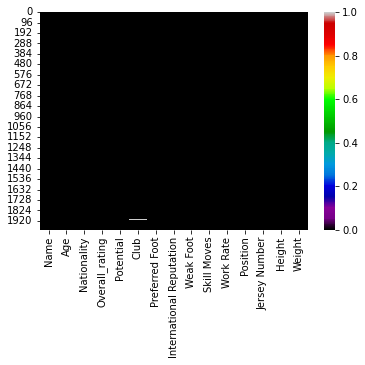

In [6]:
sns.heatmap(df.isna(),cmap='nipy_spectral')
plt.show()

In [7]:
df['Club'].fillna(method='ffill',inplace=True)

<AxesSubplot:>

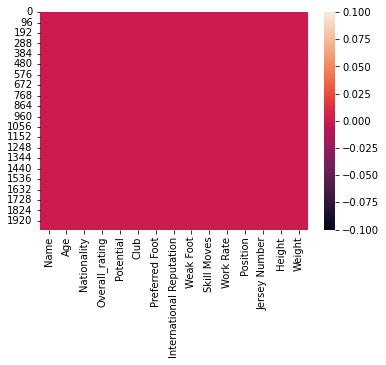

In [8]:
sns.heatmap(df.isna())


a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size



In [9]:
df['Age']

0       31
1       33
2       26
3       27
4       27
        ..
1995    22
1996    31
1997    22
1998    32
1999    28
Name: Age, Length: 2000, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

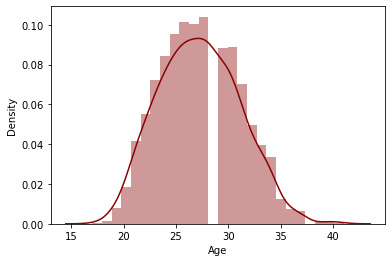

In [10]:
sns.distplot(df['Age'],color='DarkRed')

In [11]:
#takinng sample from age and performind central limit theorm
sample_size=200
no_of_sample=2000
sample_of_mean=[]
for i in range(no_of_sample):
    sample_age=np.random.choice(df['Age'] ,size=200)
    sample_mean=np.mean(sample_age)
    sample_sd=np.std(sample_age,ddof=1)
    sample_of_mean.append(sample_mean)
print('Population mean:', df['Age'].mean())
print('Population standard deviation:',df['Age'].std())
print('-'*40)
print('sample_mean:',sample_mean)
print('sample_standard error:',sample_sd)

Population mean: 27.2315
Population standard deviation: 3.8590612753574423
----------------------------------------
sample_mean: 26.915
sample_standard error: 4.057101844529469


<AxesSubplot:ylabel='Density'>

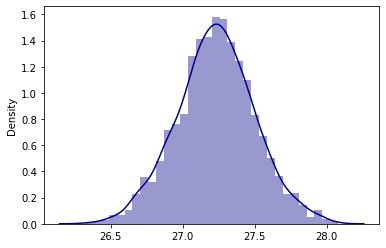

In [12]:
sns.distplot(sample_of_mean,color='DarkBlue')

In [13]:
#estimated sample error tend to decrease if we take large sample size beecause if we take large sample size
#then the sample mean will get closer to population mean. that will eventually standard error minimal

b)	Is there any evidence that the players overall rating is greater than 80?



In [14]:
#H0>=80
#H1<80

In [15]:
n=len(df)
x_bar=df['Overall_rating'].mean()
mu=80
sd=df['Overall_rating'].std()

In [16]:
#calculating z_stat for one sample z_test
z_stat=(x_bar - mu)/(sd/n**0.5)
print('z_stat:',z_stat)

z_stat: -24.538460498672645


In [17]:
#calculating z_critical
z_critical=stats.norm.ppf(0.05)
print('z_critical:',z_critical)

z_critical: -1.6448536269514729


In [18]:
p_value=stats.norm.cdf(z_stat)
print('P_value :',p_value)

P_value : 2.8718642827629733e-133


In [19]:
#here z_stat<z_critical, therefor reject null=accept alternate, so we can conclude that
# player overall rating is not greater than 80

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.



In [20]:
#H0:variable are independent
#H1:variables are not independent

In [21]:
observed_values=pd.crosstab(df['Preferred Foot'],df['Potential'])
observed_values

Potential,75,76,77,78,79,80,81,82,83,84,...,86,87,88,89,90,91,92,93,94,95
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,59,42,41,31,34,51,32,29,30,32,...,17,16,9,13,6,1,4,0,2,0
Right,153,182,176,114,120,142,111,100,107,78,...,49,36,32,18,15,11,5,4,1,1


In [22]:
#calculating critical value for chisqaure test for independence
chi_critical=stats.chi2.isf(0.05,20)
print('chi_critical:',chi_critical)

chi_critical: 31.41043284423092


In [23]:
#calculating test_stat ,p_value
test_stat , p_value , dof , expected_value=chi2_contingency(observed_values,correction=False)
print('test_stat:',test_stat)
print('p_value',p_value)
print('dof',dof)
print('expected_value',expected_value)

test_stat: 29.55053700074528
p_value 0.07747130218941192
dof 20
expected_value [[ 49.396  52.192  50.561  33.785  35.882  44.969  33.319  30.057  31.921
   25.63   22.368  15.378  12.116   9.553   7.223   4.893   2.796   2.097
    0.932   0.699   0.233]
 [162.604 171.808 166.439 111.215 118.118 148.031 109.681  98.943 105.079
   84.37   73.632  50.622  39.884  31.447  23.777  16.107   9.204   6.903
    3.068   2.301   0.767]]


In [24]:
#here pvalue>alpha(level of significance),therefore failed to reject null,  so we can conclude that
# preferred foot has no impact on potential

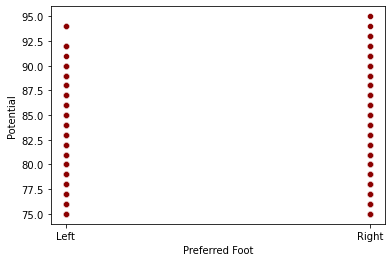

In [25]:
#plotting scatterplot 
sns.scatterplot(data=df,x='Preferred Foot',y='Potential',color='DarkRed')
plt.show()

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].



In [26]:
#H0:variable are independent
#H1:variables are not independent

In [27]:
ObservedValue=pd.crosstab(df['Overall_rating'],df['Potential'])


In [28]:
#dof
d0f=(19-1)*(21-1)
d0f

360

In [29]:
#calculating critical value for chisquare test of independence
chi_critical=stats.chi2.isf(0.05,360)
print('chi_critical:',chi_critical)
print('-'*35)
#calculating test_stat and p_value
test_stat , p_value , dof ,expected_value=chi2_contingency(ObservedValue,correction=False)
print('test_stat:',test_stat)
print('p_value',p_value)
print('dof',dof)


chi_critical: 405.24350231839315
-----------------------------------
test_stat: 8592.974091115166
p_value 0.0
dof 360


In [30]:
##here test_stat>z_critical, therefor reject null=accept alternate, so we can conclude that
#overall rating and potential are dependent on each other

e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.


In [31]:
#H0:variable are independent
#H1:variables are not independent

In [32]:
observedValue=pd.crosstab(df['Skill Moves'],df['Overall_rating'])

In [33]:
#dof
observedValue.shape
dof=(5-1)*(19-1)
dof

72

In [34]:
#calculating critical value for chisquare test of independence
chi_critical=stats.chi2.isf(0.05,72)
print('chi_critical:',chi_critical)
print('-'*35)
#calculating test_stat and p_value
test_stat , p_value , dof ,expected_value=chi2_contingency(observedValue,correction=False)
print('test_stat:',test_stat)
print('p_value',p_value)
print('dof',dof)


chi_critical: 92.80827038310773
-----------------------------------
test_stat: 264.3544361441865
p_value 9.004103479489286e-24
dof 72


In [35]:
##here test_stat>z_critical, therefor reject null=accept alternate, so we can conclude that
#overall rating and skillmove are dependent on each other

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

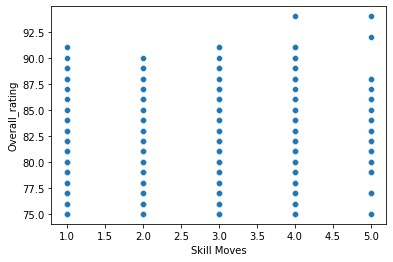

In [36]:
#plotting scatterplot
sns.scatterplot(data=df,x='Skill Moves',y='Overall_rating')

# Note: 
1) Perform all the Statistical analysis with 5% (Significance level). 
      
2) Assume all the features are normally distributed and have equal variance.




2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 



In [37]:
df1=pd.read_csv('phone.csv')
df1.head(5)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


<AxesSubplot:>

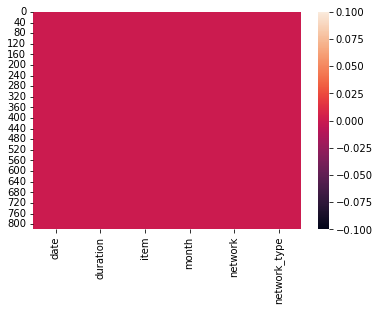

In [38]:
#checking null value
sns.heatmap(df1.isna())

In [39]:
#manipulating data
df1['date']=pd.to_datetime(df1['date'])
df1['month']=pd.to_datetime(df1['month'])

In [40]:
#checking dtype
df1.dtypes

date            datetime64[ns]
duration               float64
item                    object
month           datetime64[ns]
network                 object
network_type            object
dtype: object

a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.


In [41]:
#calculatimng estimated mean interval for both the variables
x_bar=df1['duration'].mean()
sd=df1['duration'].std()
n=len(df1)
#calculating 95 % interval
print('confidence interval for 95%:',stats.norm.interval(0.95,loc=x_bar , scale=sd/n**0.5))

print('-'*70)

#calculating 99 % interval
print('confidence interval for 99%:',stats.norm.interval(0.99,loc=x_bar , scale=sd/n**0.5))

confidence interval for 95%: (141.1778397288302, 147.4320313908407)
----------------------------------------------------------------------
confidence interval for 99%: (140.19523500408818, 148.41463611558274)


In [42]:
#confidence interval for 99% are wider than 95%

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.


In [43]:
#H0:avg duration for all network is same
#H1:atleast for one network avg duration is different

In [44]:
df1['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [45]:
data_d=df1[df1['network']=='data']['duration']
data_v=df1[df1['network']=='Vodafone']['duration']
data_m=df1[df1['network']=='Meteor']['duration']
data_te=df1[df1['network']=='Tesco']['duration']
data_th=df1[df1['network']=='Three']['duration']
data_vo=df1[df1['network']=='voicemail']['duration']
data_l=df1[df1['network']=='landline']['duration']


In [46]:
#checking normality of data by using shaphiro walk test
stats.shapiro(df1['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [47]:
#p_value> alpha , therefore failed to rejct null , data is normally distributed

In [48]:
#checking equality of variances by using levene test
stats.levene(data_d,data_l,data_m,data_te,data_th,data_v,data_vo)

LeveneResult(statistic=1.5297363988286818, pvalue=0.1653481809327658)

In [49]:
#p_value> alpha , therefore failed to reect null , so variances are equal

In [50]:
#calculating dof
k=df1['network'].nunique()
N=df1['duration'].value_counts().sum()
k

7

In [51]:
#calclating critical value
f_critical=stats.f.isf(0.05,dfd=k-1,dfn=N-k)
print('f_critical for one-wat annova:',f_critical)

print('-'*70)
#calculating f_stat and p_value
f_stat,p_value=stats.f_oneway(data_d,data_l,data_m,data_te,data_th,data_v,data_vo)
print('f_stat:',f_stat)
print('p_value:',p_value)

f_critical for one-wat annova: 3.6741933778842375
----------------------------------------------------------------------
f_stat: 1.4036497792001215
p_value: 0.2102939953009413


In [52]:
# f_stat<f_critical, therefore failed to reject null, so we can conclude that all networks are equally distributed

c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.


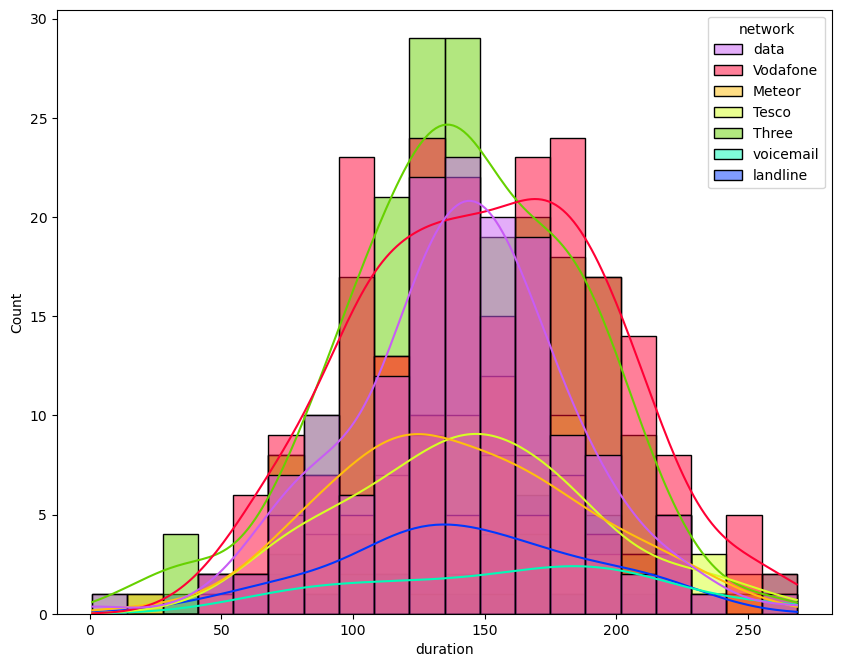

In [53]:
plt.figure(figsize=(10,8),dpi=100)
sns.histplot(data=df1,x='duration',hue='network',kde=True,palette="gist_ncar_r")
plt.show()

In [54]:
#by visualising we can say that all networks are almost equally distributed

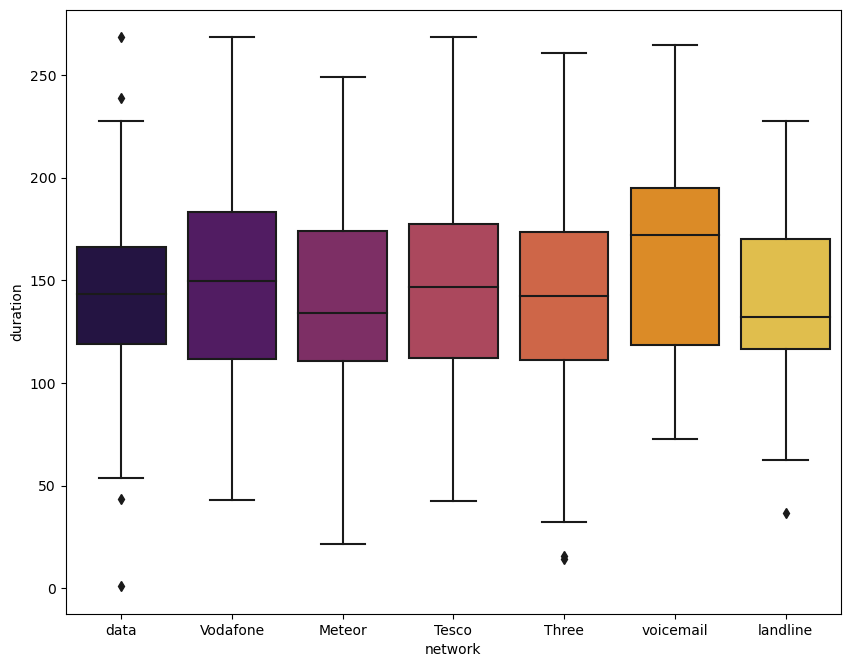

In [76]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(x='network',y='duration',data=df1,palette='inferno')
plt.show()

d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [55]:
df1.columns

Index(['date', 'duration', 'item', 'month', 'network', 'network_type'], dtype='object')

In [56]:
#H0:variables are independent
#H1:variables are not independent

In [57]:
observed_Value=pd.crosstab(df1['item'],df1['duration'])
observed_Value


duration,0.993514,14.173899,15.927469,21.456720,32.116432,32.957849,36.796316,38.178570,38.190416,42.386148,...,250.015752,250.865661,252.947691,255.202191,260.813244,264.422909,264.850816,268.343460,268.443922,268.458090
item,,,,,,,,,,,,,,,,,,,,,
call,0,0,1,1,1,0,1,1,0,1,...,1,0,1,1,1,1,0,0,1,0
data,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
sms,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [58]:
#dof
observed_Value.shape
dof=(3-1)*(820-1)
dof

1638

In [59]:
#calculating critical value
chi_critical=stats.chi2.isf(0.05,1638)
print('chi_critical for chisquare test: ',chi_critical)

print(' ')
print('-'*100)
#calculating test_stat , p_value
test_stat , p_value ,dof ,expected_value=chi2_contingency(observed_Value , correction=False)
print('test_stat:',test_stat)
print('p_value',p_value)
print('dof',dof)
print('expected_value',expected_value)

chi_critical for chisquare test:  1733.2686637254637
 
----------------------------------------------------------------------------------------------------
test_stat: 1640.0
p_value 0.4814258260445956
dof 1638
expected_value [[0.47317073 0.47317073 0.47317073 ... 0.47317073 0.47317073 0.47317073]
 [0.18292683 0.18292683 0.18292683 ... 0.18292683 0.18292683 0.18292683]
 [0.34390244 0.34390244 0.34390244 ... 0.34390244 0.34390244 0.34390244]]


In [60]:
#here p_value>alpha(level of significance ),therefore failed to reject null, so we can conclude that item and 
#duration are independent

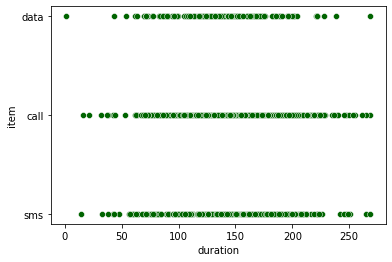

In [61]:
sns.scatterplot(data=df1,x='duration',y='item',color='DarkGreen')
plt.show()

e)	Perform statistical tests to identify the relation between network and network_type. 


In [62]:
#H0:variables are independent
#H1:variables are not independent

In [63]:
Table=pd.crosstab(df1['network'],df1['network_type'])
Observed_Value=Table.values
Observed_Value

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [64]:
#dof
Observed_Value.shape
dof=(7-1)*(4-1)
dof

18

In [65]:
#calculating critical value
chi_critical=stats.chi2.isf(0.05,18)
print('chi_critical for chisquare test: ',chi_critical)
print(Observed_Value)

print(' ')
print('-'*100)
#calculating test_stat , p_value
test_stat , p_value ,dof ,expected_value=chi2_contingency(Observed_Value , correction=False)
print('test_stat:',test_stat)
print('p_value',p_value)
print('dof',dof)
print('expected_value',expected_value)

chi_critical for chisquare test:  28.869299430392637
[[  0   0  87   0]
 [  0   0  84   0]
 [  0   0 215   0]
 [  0   0 215   0]
 [150   0   0   0]
 [  0  42   0   0]
 [  0   0   0  27]]
 
----------------------------------------------------------------------------------------------------
test_stat: 2460.0
p_value 0.0
dof 18
expected_value [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


In [66]:
#here p_value<alpha, therefore reject null=accept alternate , so we can conclude that network and network 
#dependent on each other

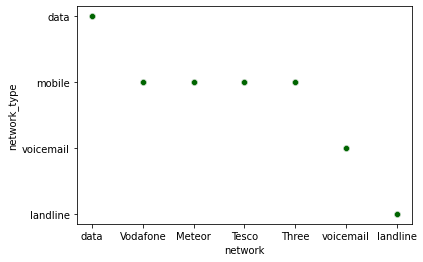

In [67]:
sns.scatterplot(data=df1,x='network',y='network_type',color='DarkGreen')
plt.show()